# 이미지에 필름 카메라 필터 적용하기

## 1. Install DeOldify

https://github.com/jantic/DeOldify

In [10]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2609, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 2609 (delta 87), reused 209 (delta 70), pack-reused 2346
Receiving objects: 100% (2609/2609), 69.71 MiB | 21.61 MiB/s, done.
Resolving deltas: 100% (1170/1170), done.


In [11]:
cd DeOldify

/content/DeOldify/DeOldify


## 2. Setup

In [12]:
from deoldify import device
from deoldify.device_id import DeviceId

device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

GPU not available.


In [13]:
!pip install -r requirements-colab.txt

In [14]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [15]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

mkdir: cannot create directory ‘models’: File exists
--2023-10-22 03:21:01--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 89.187.162.244, 2400:52e0:1a00::1067:1
Connecting to data.deepai.org (data.deepai.org)|89.187.162.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  4.99MB/s    in 51s     

2023-10-22 03:21:52 (4.82 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [16]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can als

## 3. 필름 필터 적용

- 상단에 출력되는 이미지가 필터 적용된 이미지
- 하단에 출력되는 두 가지 이미지는 필터 적용 before(좌측)/after(우측)

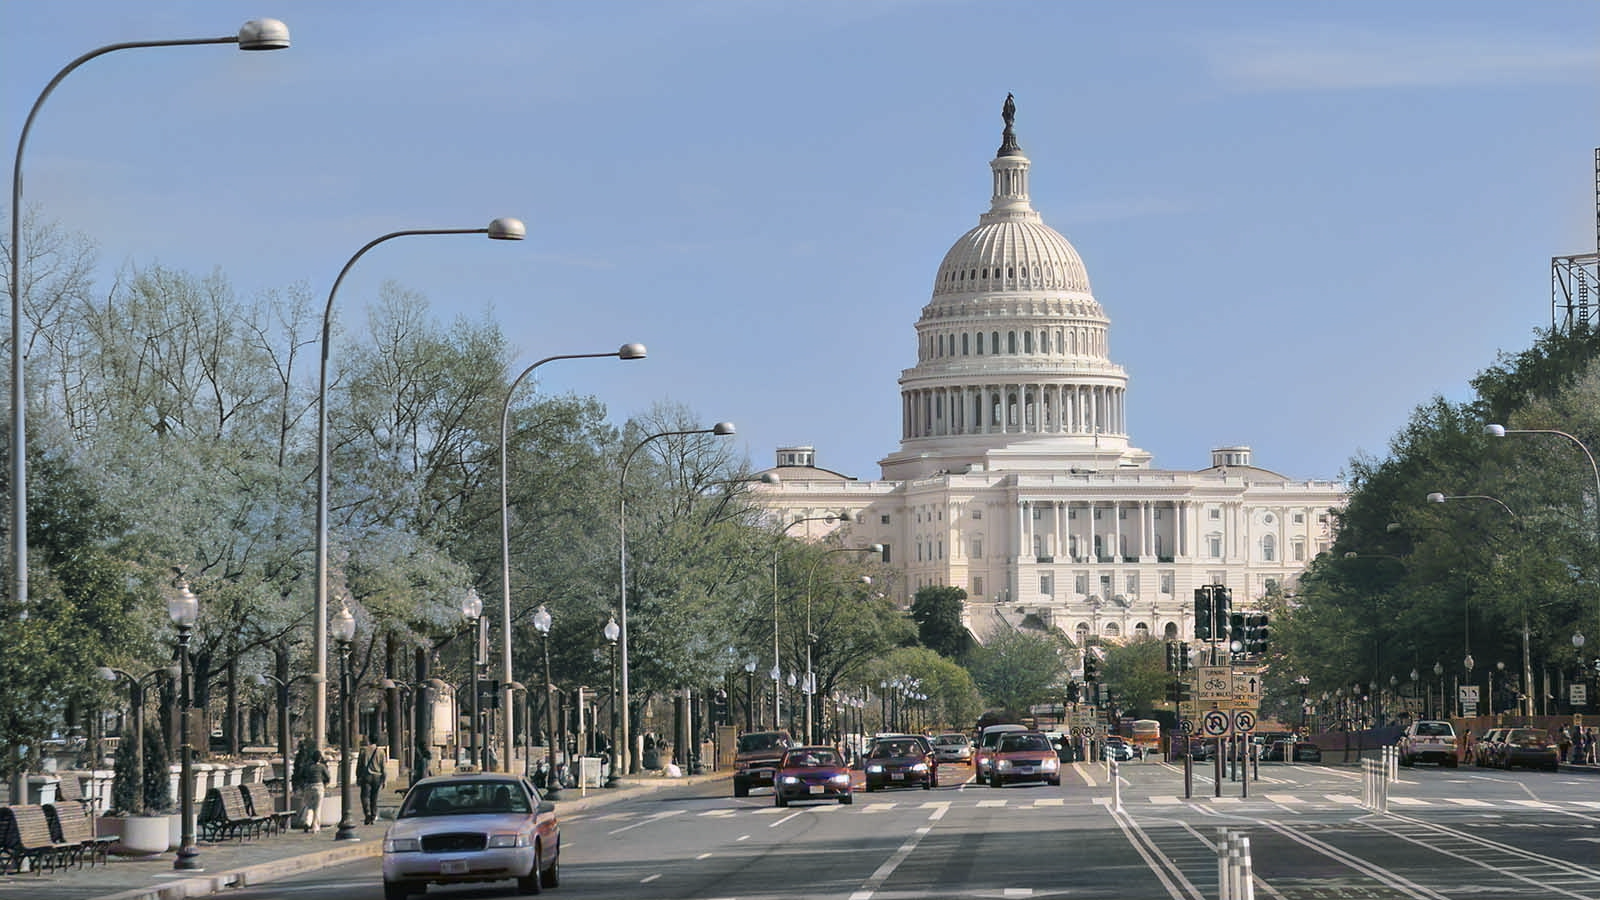

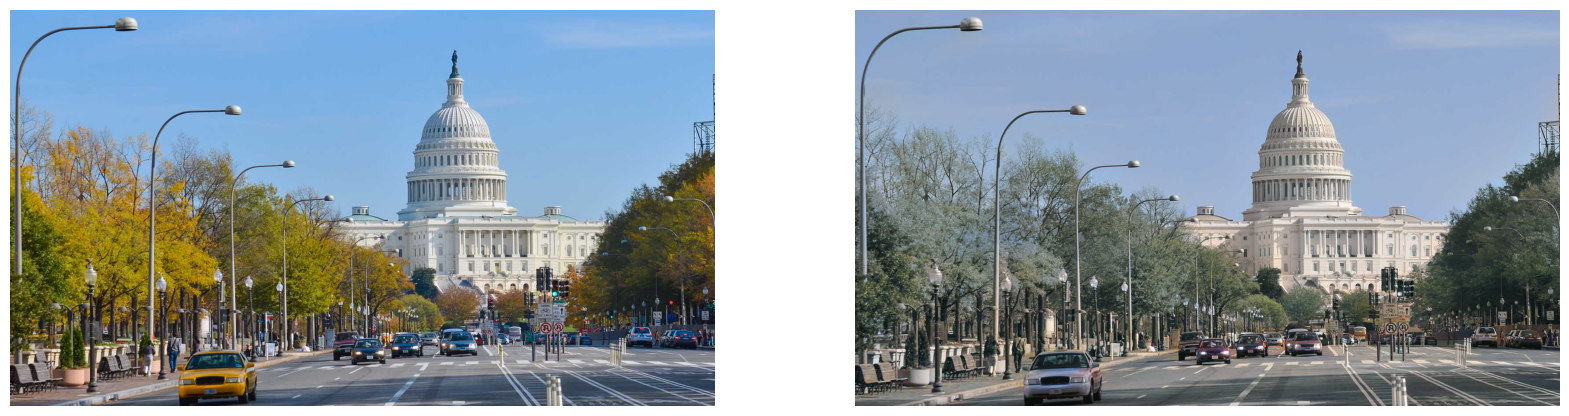

In [17]:
source_url = 'https://cdn.hswstatic.com/gif/dc-state.jpg' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

## 4.factor 변경해서 필터 적용 정도 변경하기

권장하는 factor보다 낮게 설정하면 선명도를 좀 더 떨어뜨릴 수 있음 (more 70’s nostalgic vibe)

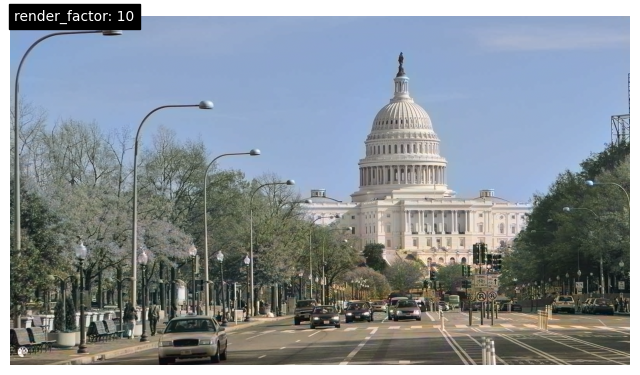

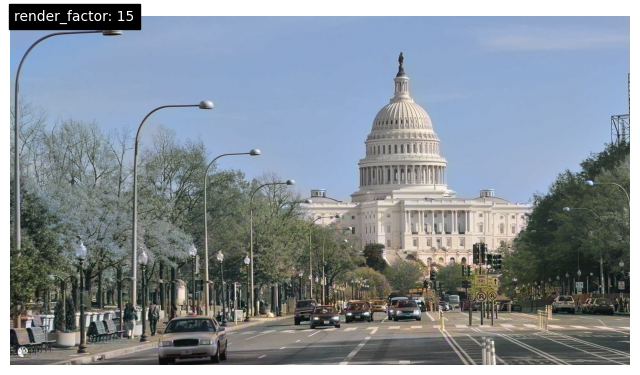

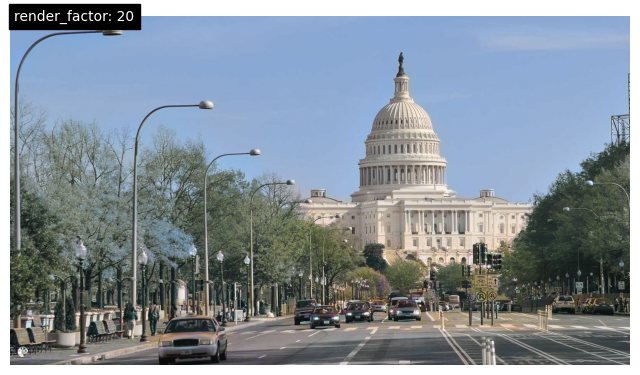

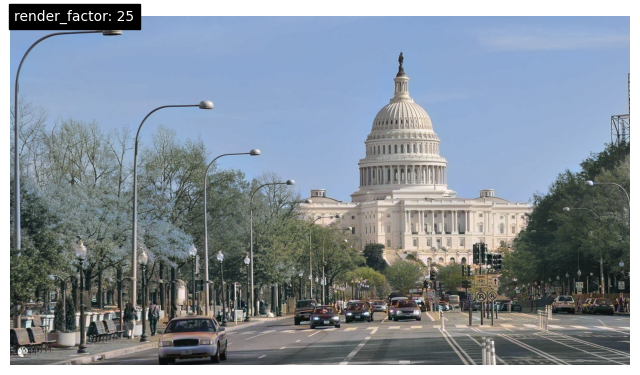

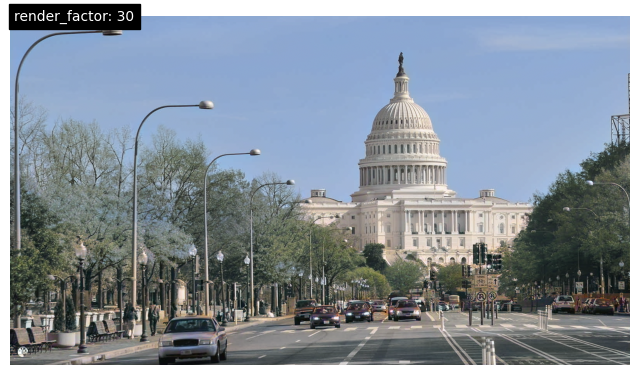

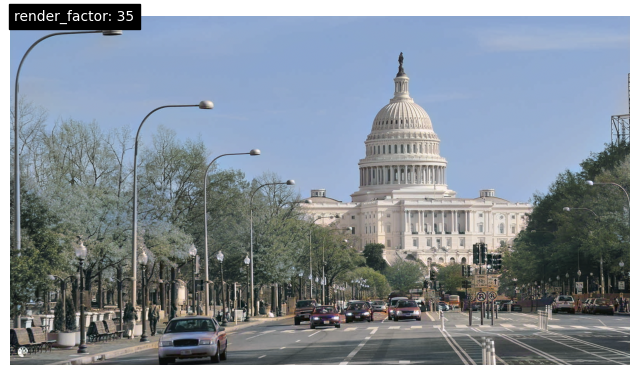

In [19]:
for i in range(10,40,5):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))